# Introduction to ```spaCy```

In [1]:
import os
import spacy
import pandas as pd

# initialise spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
type(nlp)

spacy.lang.en.English

In [3]:
example = "This is an example sentence in English"

In [4]:
doc = nlp(example)

In [5]:
type(doc)

spacy.tokens.doc.Doc

In [6]:
for token in doc:
    print(token.text, token.pos_, token.tag_, token.lemma_)

This DET DT this
is AUX VBZ be
an DET DT an
example NOUN NN example
sentence NOUN NN sentence
in ADP IN in
English PROPN NNP English


In [7]:
in_file = os.path.join("..", "data", "labelled_data", "fake_or_real_news.csv")

In [8]:
data = pd.read_csv(in_file)

In [9]:
data.sample(3)

,Unnamed: 0,title,text,label
1405,118,"I'm a black ex-cop, and this is the real truth...","On any given day, in any police department in ...",REAL
6027,2512,Surprise! Donald Trump is wrong about immigran...,Donald Trump's two-week-old campaign has been ...,REAL
4525,2016,Is Jeb Bush conservative enough?,"Washington (CNN) He cut billions in taxes, int...",REAL


In [10]:
del data["Unnamed: 0"]

In [11]:
data.sample(3)

,title,text,label
2659,Dozens of intelligence analysts reportedly cla...,Dozens of intelligence analysts working at the...,REAL
1389,20 Foods That Naturally Unclog Arteries and Pr...,20 Foods That Naturally Unclog Arteries and Pr...,FAKE
5286,Gary Johnson picks up his first congressional ...,Washington (CNN) Republican Rep. Scott Rigell ...,REAL


In [12]:
data["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

## Filter on columns

In [13]:
data["label"]=="FAKE"

0        True
1        True
2       False
3        True
4       False
        ...  
6330    False
6331     True
6332     True
6333    False
6334    False
Name: label, Length: 6335, dtype: bool

In [14]:
fake_news_df = data[data["label"]=="FAKE"]
real_news_df = data[data["label"]=="REAL"]

In [15]:
print(fake_news_df["label"].value_counts())
real_news_df["label"].value_counts()

FAKE    3164
Name: label, dtype: int64


REAL    3171
Name: label, dtype: int64

## Counters

In [16]:
counter = 0

test_list = range(0, 100)
for entry in test_list:
    if entry == 10 or entry == 99:
        counter += entry

In [17]:
counter

109

## Counting features in data

In [18]:
# Create counters
adj_count = 0

# process text in batch
for doc in nlp.pipe(fake_news_df["title"], batch_size = 500):
    for token in doc:
        if token.tag_ == "JJ":
          adj_count += 1

In [19]:
print(adj_count)

1794


In [20]:
print(counter)

109


## Sentiment with spacy

In [35]:
from spacytextblob.spacytextblob import SpacyTextBlob
import glob

In [36]:
spacy_text_blob = SpacyTextBlob()

In [37]:
nlp.add_pipe(spacy_text_blob)

ValueError: [E007] 'text_blob_sentiment' already exists in pipeline. Existing names: ['tagger', 'parser', 'ner', 'text_blob_sentiment']

In [38]:
text_file = os.path.join("..", "data", "100_english_novels", "corpus", "Woolf_Lighthouse_1927.txt")

In [54]:
with open(text_file, "r", encoding="utf-8") as file:
    text = file.read()    

In [57]:
print(text[:300])

﻿To the Lighthouse


THE WINDOW


1


"Yes, of course, if it's fine tomorrow," said Mrs. Ramsay. "But you'll
have to be up with the lark," she added.

To her son these words conveyed an extraordinary joy, as if it were
settled, the expedition were bound to take place, and the wonder to which
he had 


In [58]:
doc = nlp(text)

In [61]:
polarity = []

for sentence in doc.sents:
    score = sentence._.sentiment.polarity
    polarity.append(score)

In [62]:
polarity[:10]

[0.0,
 0.0,
 0.4166666666666667,
 0.0,
 0.5666666666666667,
 0.4,
 -0.18333333333333332,
 0.8,
 0.4,
 0.0006926406926406867]

In [63]:
import matplotlib.pyplot as plt

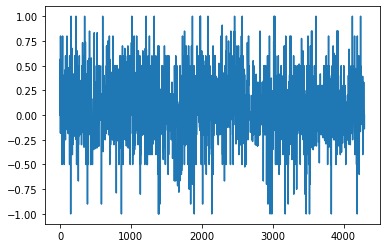

In [64]:
plt.plot(polarity)

In [65]:
smoothed_sentiment = pd.Series(polarity).rolling(100).mean() # 500 sentences
# series are just columns

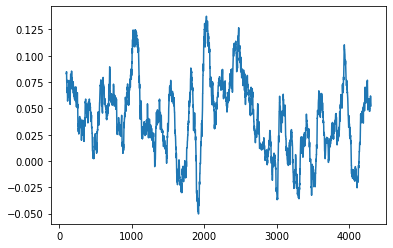

In [66]:
plt.plot(smoothed_sentiment)